In [1]:
import uproot
import matplotlib.pyplot as plt
import awkward as ak

class Type:
    def __init__(self, name):
        self.name = name
        self.sameSignFile = uproot.open('highHcal_'+str(self.name)+'_tagAligned (1).root')
        self.sameSignEvents = self.sameSignFile['demo']['allEvents']['sigVariables']
        self.branches = self.sameSignEvents.arrays()
        self.eta = self.branches['eta']
        self.phi = self.branches['phi']
        

Data = Type('data')
MC = Type('mc')

Data.sameSignFile.keys()

['demo;1',
 'demo/allEvents;1',
 'demo/allEvents/genEventCount;1',
 'demo/allEvents/genEventCount_EnBin;1',
 'demo/allEvents/sigVariables;1',
 'demo/allEvents/eventCount;1',
 'demo/allEvents/eventCount_PUup;1',
 'demo/allEvents/eventCount_PUdown;1',
 'demo/allEvents/eventCount_IDup;1',
 'demo/allEvents/eventCount_IDdown;1',
 'demo/allEvents/eventCount_ISOup;1',
 'demo/allEvents/eventCount_ISOdown;1',
 'demo/allEvents/eventCount_Trigup;1',
 'demo/allEvents/eventCount_Trigdown;1',
 'demo/allEvents/eventCount_EnBin;1',
 'demo/allEvents/dbremWeight;1',
 'demo/allEvents/MuRocWeight;1',
 'demo/allEvents/IDSF;1',
 'demo/allEvents/IDSFup;1',
 'demo/allEvents/IDSFdown;1',
 'demo/allEvents/ISOSF;1',
 'demo/allEvents/ISOSFup;1',
 'demo/allEvents/ISOSFdown;1',
 'demo/allEvents/TrigSF;1',
 'demo/allEvents/TrigSFup;1',
 'demo/allEvents/TrigSFdown;1',
 'demo/allEvents/cutProgress;1',
 'demo/allEvents/signalCategory;1',
 'demo/allEvents/DiMuonInvariantMass;1',
 'demo/allEvents/TaggingMuonEta;1',
 'dem

In [2]:
Data.sameSignEvents

<TTree 'sigVariables' (47 branches) at 0x01f8db7fe190>

In [3]:
Data.sameSignEvents.keys()

['pt',
 'eta',
 'phi',
 'staDR',
 'staPhi',
 'staE',
 'standaloneDEoverE',
 'staChi',
 'cscDR',
 'probeCharge',
 'ecalIso',
 'cellEdgeDeta',
 'cellEdgeDphi',
 'PUupWeight',
 'PUdownWeight',
 'IDupWeight',
 'IDdownWeight',
 'ISOupWeight',
 'ISOdownWeight',
 'TrigUpWeight',
 'TrigDownWeight',
 'EnBinWeight',
 'lumi',
 'event',
 'cscDRbyStation_0',
 'dtDRbyStation_0',
 'cscDRbyStation_1',
 'dtDRbyStation_1',
 'cscDRbyStation_2',
 'dtDRbyStation_2',
 'cscDRbyStation_3',
 'dtDRbyStation_3',
 'HEDepth_0',
 'found_HEDepth_0',
 'HEDepth_1',
 'found_HEDepth_1',
 'HEDepth_2',
 'found_HEDepth_2',
 'HEDepth_3',
 'found_HEDepth_3',
 'HEDepth_4',
 'found_HEDepth_4',
 'HEDepth_5',
 'found_HEDepth_5',
 'HEDepth_6',
 'found_HEDepth_6',
 'EventWeight']

In [4]:
Data.branches['pt']

<Array [42.6, 33.6, 48.1, 45.6, ..., 38.1, 38.3, 49.5] type='132572 * float64'>

<ErrorbarContainer object of 3 artists>

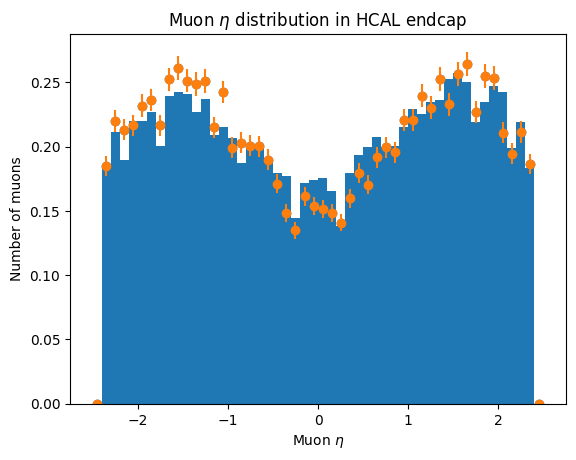

In [5]:
#TEST CODE

import math
import numpy as np

class Coord:
    def __init__(self,name,x1,x2,bins):
        self.name = name
        self.x1 = x1
        self.x2 = x2
        self.bins = bins
        self.bin_width = (x2 - x1) / self.bins           #bin width

Eta = Coord('eta',-2.5,2.5,50)
Phi = Coord('phi',-math.pi, math.pi,50)

plt.hist(Data.eta, bins=Eta.bins, range=(Eta.x1, Eta.x2), density=True)
plt.title('Muon $\eta$ distribution in HCAL endcap')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
a = np.histogram(MC.eta, bins=Eta.bins, range=(Eta.x1, Eta.x2), density=None)

#a[0] frequency
#a[1] bin edges (we want bin CENTERS to convert to scatter)


nf = 1 / (np.sum(a[0]) * Eta.bin_width)    #normalization factor
b = (a[1] + Eta.bin_width/2)               #offset values by + 1/2 bin
bc=b[:-1]                           #cut last value to give bin center
f = a[0] * nf                       #normalized frequency
eb = (a[0] ** 0.5 ) * nf            #normalized vertical error bar

plt.scatter(bc,f)
plt.errorbar(bc,f, yerr=eb, fmt="o")

<ErrorbarContainer object of 3 artists>

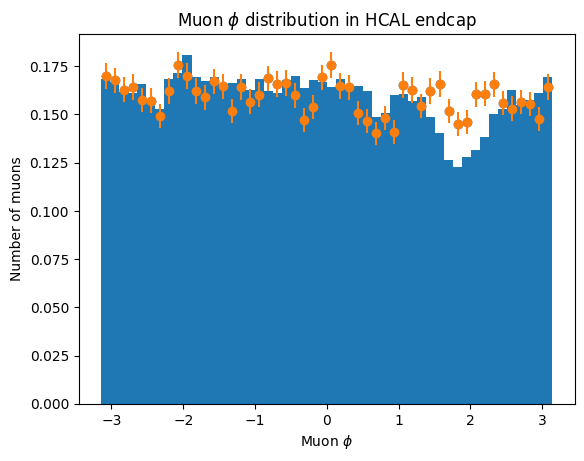

In [6]:
#TEST CODE

import math
import numpy as np

plt.hist(Data.phi, bins=Phi.bins, range=(Phi.x1, Phi.x2), density=True)
plt.title('Muon $\phi$ distribution in HCAL endcap')
plt.xlabel('Muon $\phi$')
plt.ylabel('Number of muons')
a = np.histogram(MC.phi, bins=Phi.bins, range=(Phi.x1, Phi.x2), density=None)

#a[0] frequency
#a[1] bin edges (we want bin CENTERS to convert to scatter)

nf = 1 / (np.sum(a[0]) * Phi.bin_width)    #normalization factor
b = (a[1] + Phi.bin_width/2)               #offset values by + 1/2 bin
bc=b[:-1]                           #cut last value to give bin center
f = a[0] * nf                       #normalized frequency
eb = (a[0] ** 0.5 ) * nf            #normalized vertical error bar

plt.scatter(bc,f)
plt.errorbar(bc,f, yerr=eb, fmt="o")

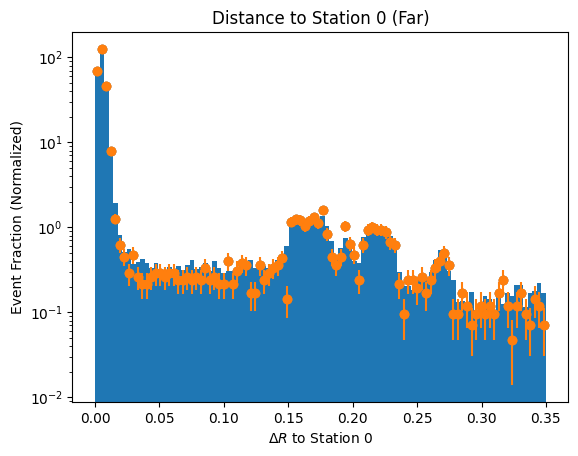

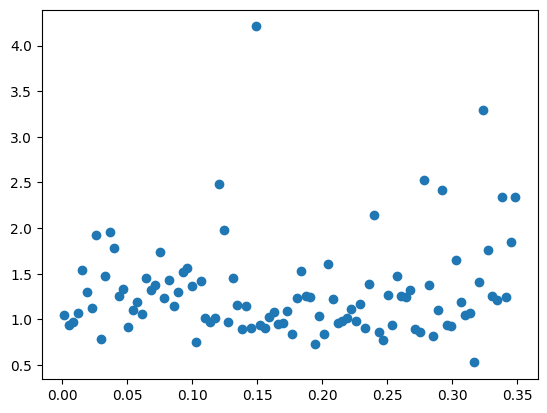

C:\Users\scien\AppData\Local\Programs\Python\Python311\Lib\site-packages\awkward\_backends\backend.py:47: RuntimeWarning: divide by zero encountered in divide
  return getattr(ufunc, method)(*args, **kwargs)


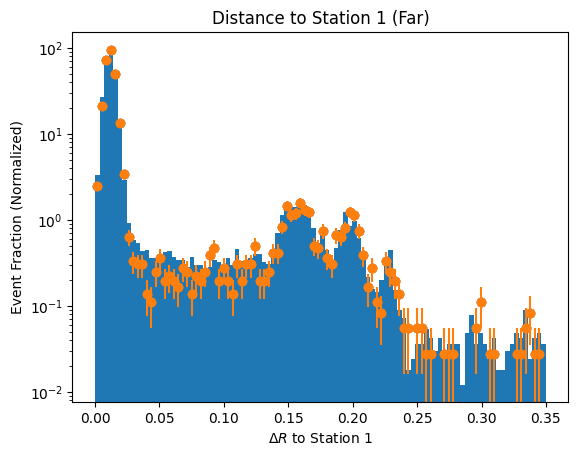

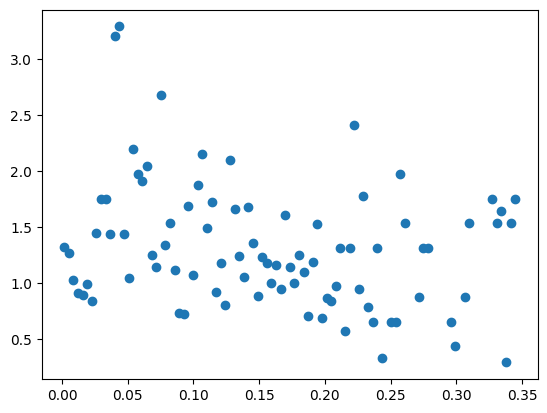

C:\Users\scien\AppData\Local\Programs\Python\Python311\Lib\site-packages\awkward\_backends\backend.py:47: RuntimeWarning: invalid value encountered in divide
  return getattr(ufunc, method)(*args, **kwargs)


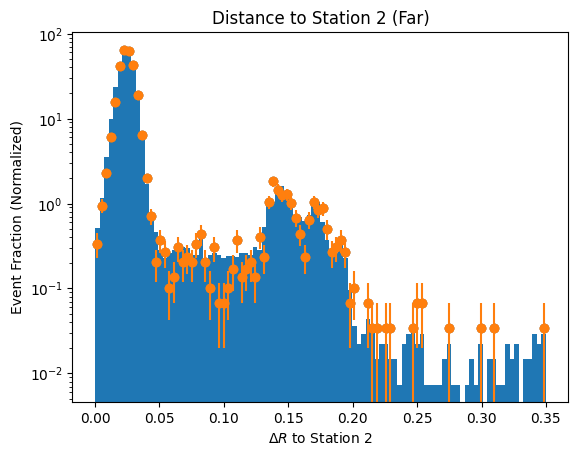

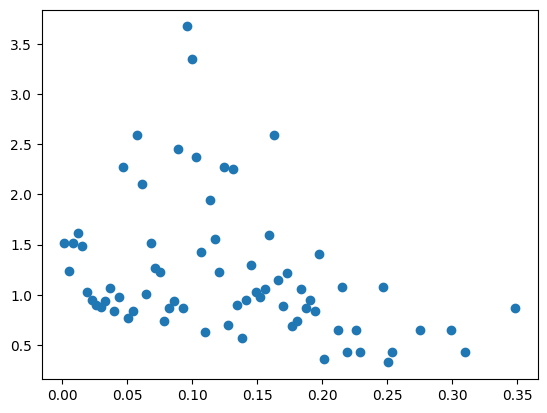

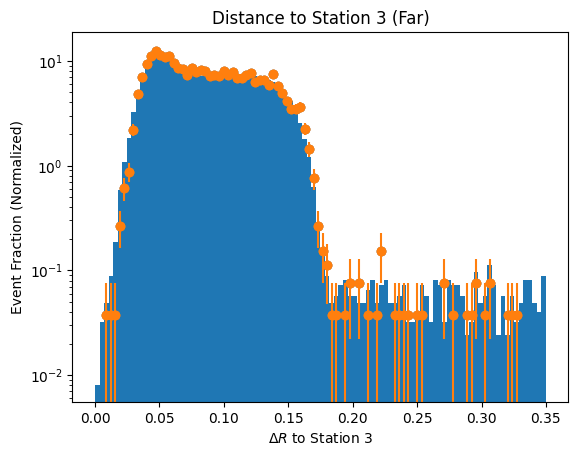

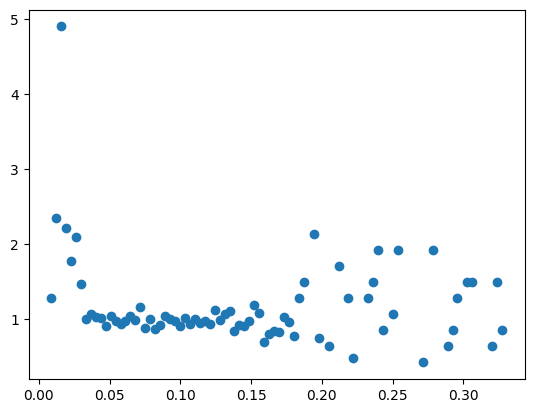

In [7]:
#SAMPLE CODE (no object oriented optimization, UGLY!!)

Data_Hist = []
MC_Hist = []
Ratio_Hist = []

for i in range (4):

    DR = Coord('delta_R',0,0.35,100) #set delta R edges/bin
    Data_min_DT_R = Data.branches['dtDRbyStation_'+str(i)] #min DR data
    MC_min_DT_R = MC.branches['dtDRbyStation_'+str(i)] #min DR MC

    plt.hist(Data_min_DT_R, bins=DR.bins, range=(DR.x1, DR.x2), density=True)
    plt.title('Distance to Station '+str(i)+' (Far)')
    plt.xlabel('$\Delta R$ to Station '+str(i))
    plt.ylabel('Event Fraction (Normalized)')
    plt.yscale('log')
    
    data = np.histogram(Data_min_DT_R, bins=DR.bins, range=(DR.x1, DR.x2), density=None)
    mc = np.histogram(MC_min_DT_R, bins=DR.bins, range=(DR.x1, DR.x2), density=None)

    #a[0] frequency
    #a[1] bin edges (we want bin CENTERS to convert to scatter)

    data_nf = 1 / (np.sum(data[0]) * DR.bin_width)    #normalization factor
    data_b = (data[1] + DR.bin_width/2)               #offset values by + 1/2 bin
    data_bc = data_b[:-1]                          #cut last value to give bin center
    data_f = data[0] * data_nf                      #normalized frequency
    data_eb = (data[0] ** 0.5 ) * data_nf           #normalized vertical error bar

    mc_nf = 1 / (np.sum(mc[0]) * DR.bin_width)    #normalization factor
    mc_b = (mc[1] + DR.bin_width/2)               #offset values by + 1/2 bin
    mc_bc = mc_b[:-1]                          #cut last value to give bin center
    mc_f = mc[0] * mc_nf                      #normalized frequency
    mc_eb = (mc[0] ** 0.5 ) * mc_nf           #normalized vertical error bar

    plt.scatter(mc_bc,mc_f)
    plt.errorbar(mc_bc,mc_f, yerr=mc_eb, fmt="o")

    Data_Hist.append([data_bc, data_f])
    MC_Hist.append([mc_bc, mc_f])
    Ratio_Hist.append(np.divide(Data_Hist[i][1], MC_Hist[i][1]))
    
    plt.subplot
    plt.scatter(mc_bc,mc_f)
    
    plt.show()
    plt.scatter(Data_Hist[i][0], Ratio_Hist[i])
    
    

    plt.show()

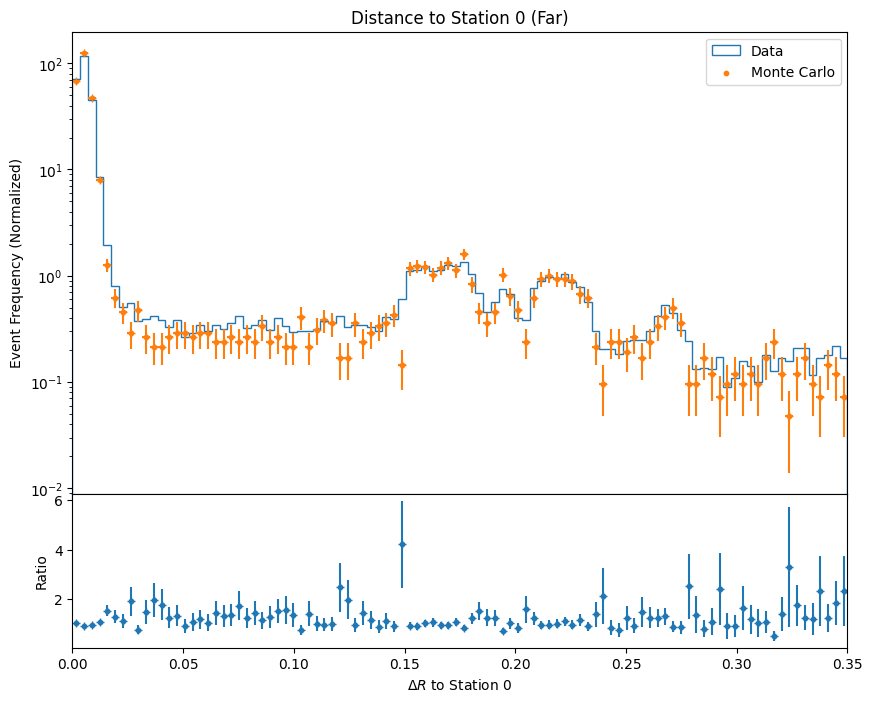

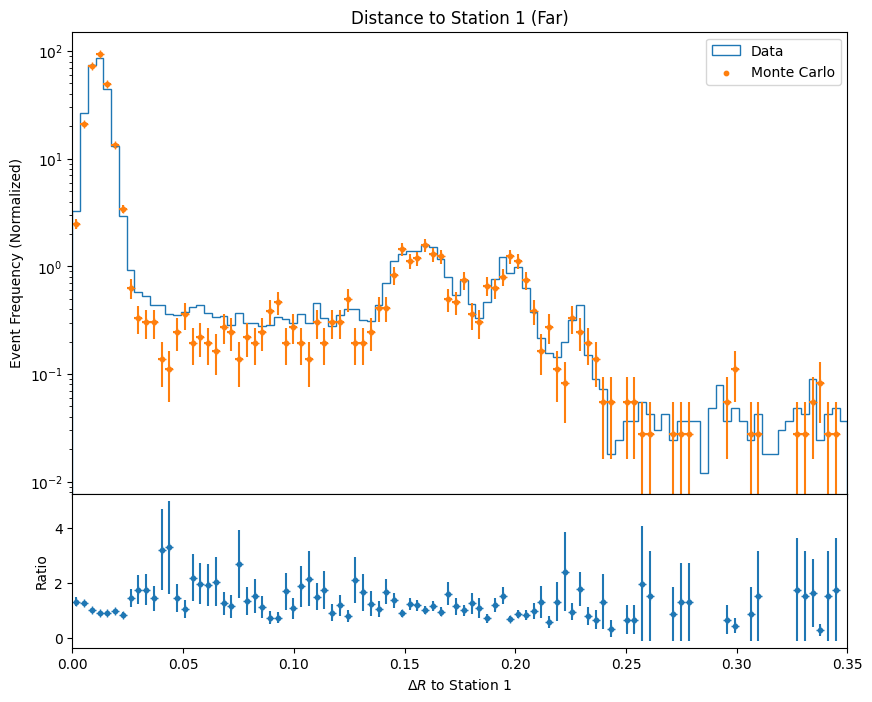

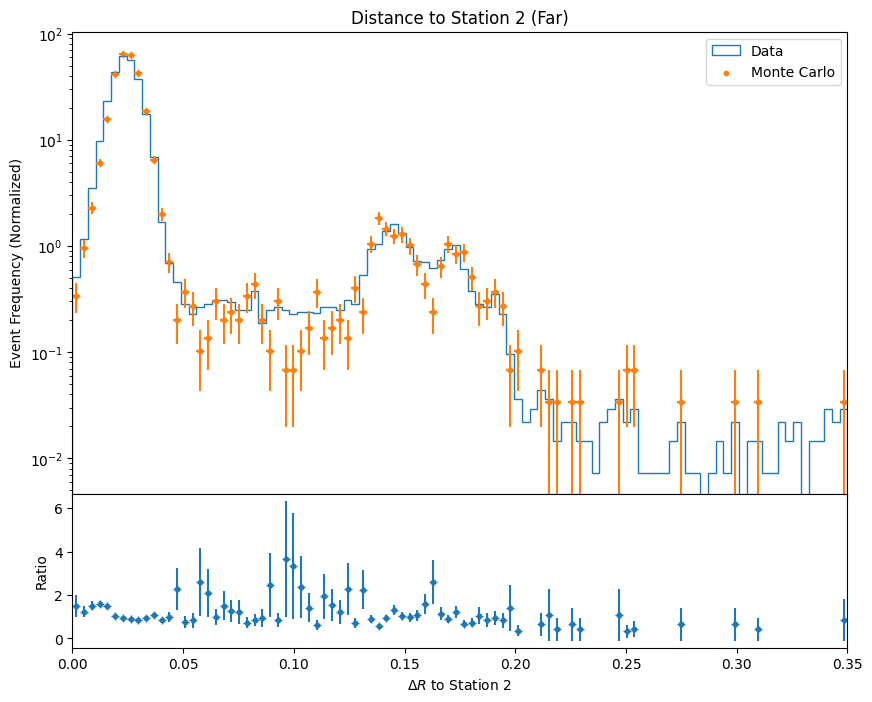

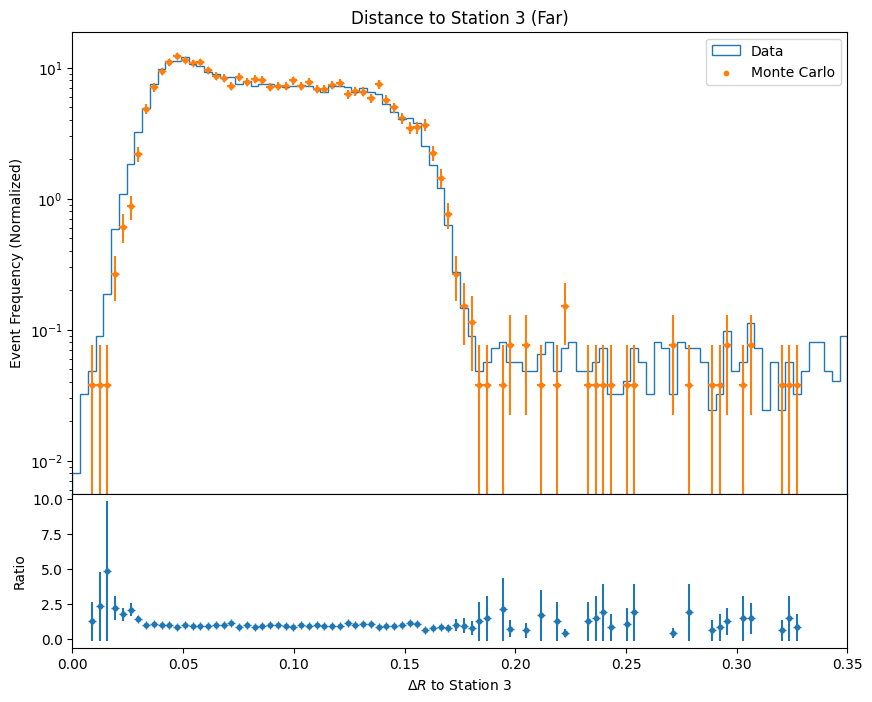

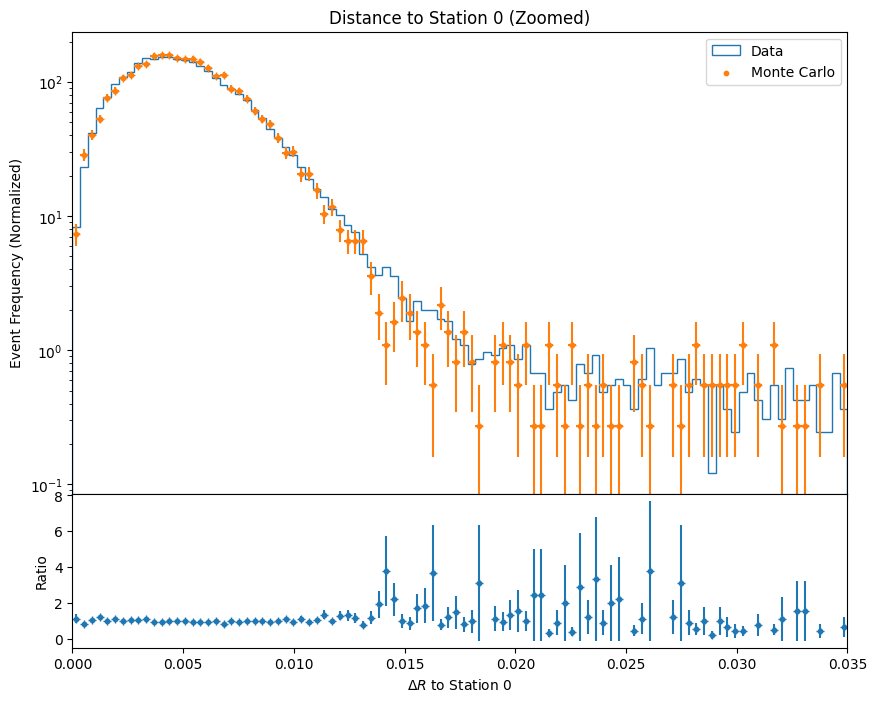

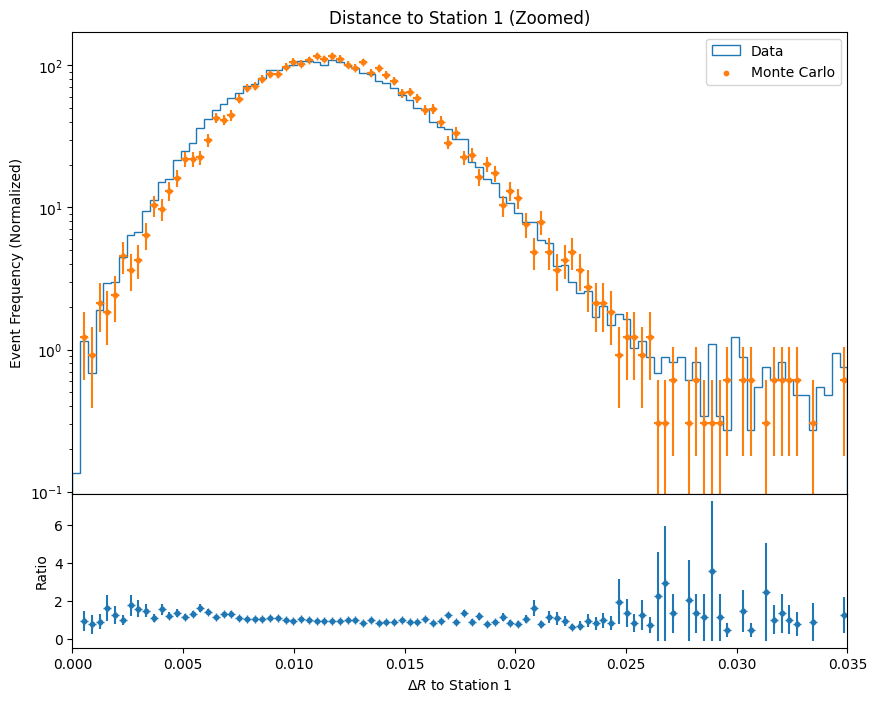

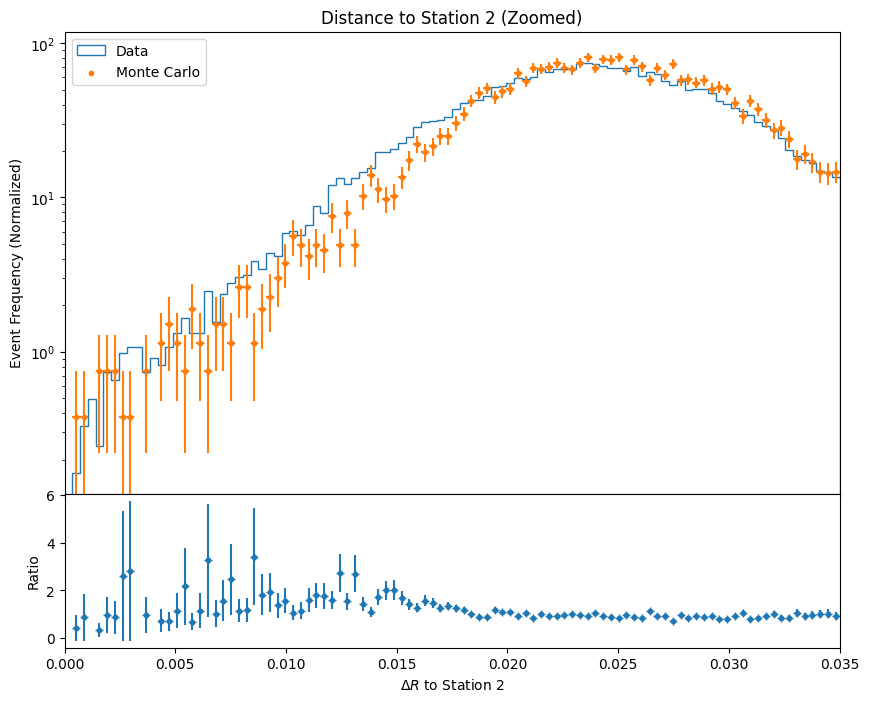

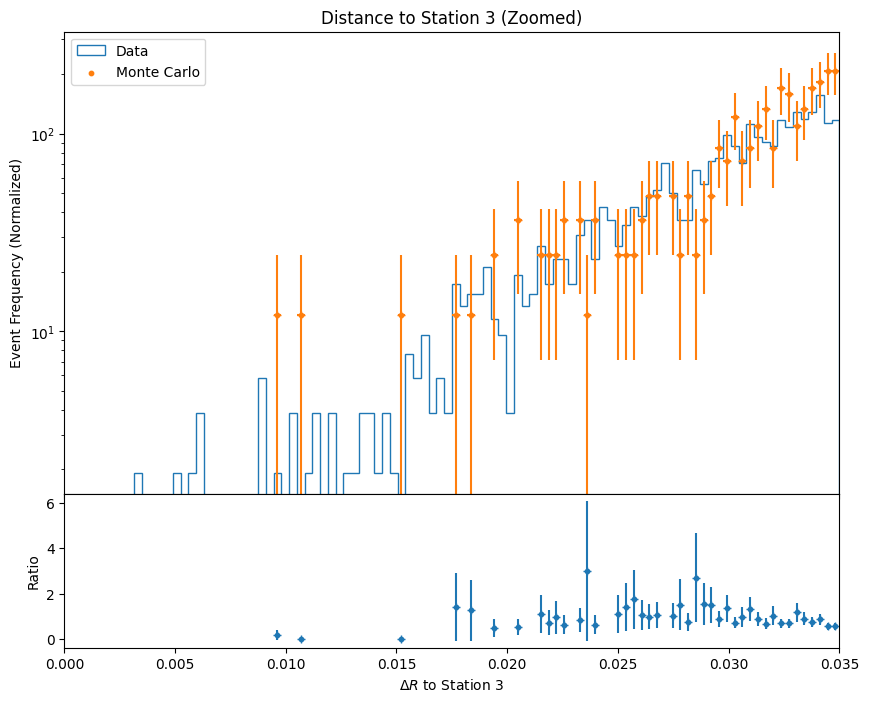

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize class to help calculate normalized histograms for any data set
class NormalizedHist:
    def __init__(self, data, bins, bin_width):
        self.data = data
        self.bins = bins
        self.bin_width = bin_width
        self.norm_factor = 1 / (np.sum(self.data[0]) * self.bin_width)  # normalization factor
        self.temp = (self.data[1] + self.bin_width / 2)  # offset values by + 1/2 bin
        self.bin_centers = self.temp[:-1]  # cut last value to give bin center
        self.freq = self.data[0] * self.norm_factor  # normalized frequency
        self.err = (self.data[0] ** 0.5) * self.norm_factor  # normalized vertical error bar

# Method for plotting histograms
def plot_hist(Data_min_DT_R, MC_min_DT_R, DR, i, x2, zoom_lvl=''):
    new_bin_width = (x2 - DR.x1) / DR.bins

    # Set up histogram, use bars for Data
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1]}, figsize=(10, 8))
    axs[0].hist(Data_min_DT_R, bins=DR.bins, range=(DR.x1, x2), density=True, histtype='step', label='Data') 
    axs[0].set_title('Distance to Station '+str(i)+ zoom_lvl)
    axs[0].set_ylabel('Event Frequency (Normalized)')
    axs[0].set_yscale('log')
    # NOTE: new_bin_width = DR.bin_width when x2=0.35; I use this new variable to define visual data resolution, 
    #       maintaining 100 bins across a smaller field of view when zoomed in - while preserving the original bin 
    #       width information to accurately calculate normalization without skew from inconsistent binning.
    

    # Create numpy histogram data for Data & MC so ratio can be calculated by initializing each as NormalizedHist Class
    # This allows calculations to be performed with attributes without using excess variables
    data_hist = NormalizedHist(np.histogram(Data_min_DT_R, bins=DR.bins, range=(DR.x1, x2), density=None), DR.bins, new_bin_width)
    mc_hist = NormalizedHist(np.histogram(MC_min_DT_R, bins=DR.bins, range=(DR.x1, x2), density=None), DR.bins, new_bin_width)

    # Scatter MC by attribute
    axs[0].scatter(mc_hist.bin_centers, mc_hist.freq, s=10, label='Monte Carlo')
    axs[0].errorbar(mc_hist.bin_centers, mc_hist.freq, xerr=new_bin_width/2, yerr=mc_hist.err, fmt='+')
    axs[0].set_xlim(0, x2)
    axs[0].legend()

    # Find ratio between frequencies at each bin
    ratio_freq = np.divide(data_hist.freq, mc_hist.freq) 

    # Calculate ratio error using sketchy formula from google images (propagation of uncertainty?)
    ratio_err = ratio_freq * np.sqrt((data_hist.err / data_hist.freq)**2 + (mc_hist.err / mc_hist.freq)**2)

    # Scatter ratio plot
    axs[1].scatter(data_hist.bin_centers, ratio_freq, s=10)
    axs[1].errorbar(data_hist.bin_centers, ratio_freq, yerr=ratio_err, fmt='+')
    axs[1].set_ylabel('Ratio')
    axs[1].set_xlabel('$\Delta R$ to Station '+str(i))
    plt.show()

# Do the thing :D
for i in range (4):
    DR = Coord('delta_R',0,0.35,100) #set delta R edges/bin
    Data_min_DT_R = Data.branches['dtDRbyStation_'+str(i)] #min DR data
    MC_min_DT_R = MC.branches['dtDRbyStation_'+str(i)] #min DR MC
    plot_hist(Data_min_DT_R, MC_min_DT_R, DR, i, 0.35, " (Far)")

# Zoomed
for i in range (4):
    DR = Coord('delta_R',0,0.35,100) #set delta R edges/bin
    Data_min_DT_R = Data.branches['dtDRbyStation_'+str(i)] #min DR data
    MC_min_DT_R = MC.branches['dtDRbyStation_'+str(i)] #min DR MC
    plot_hist(Data_min_DT_R, MC_min_DT_R, DR, i, 0.035, " (Zoomed)")
